In [1]:
# !pip install spacy
# !pip install nltk
#!python -m spacy download en_core_web_sm
# !pip install sklearn

In [2]:
import pandas as pd
import spacy
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

In [3]:
# df = pd.read_csv("dataset\user_reviews.csv")
# # df.info()

# # Remove rows with NaN values
# df.dropna(axis=0, inplace=True)

# # for getting the app with the highest number of reviews (Bowmasters)"""
# max_participants_count = df['App'].value_counts()
# print(max_participants_count)



In [4]:
# #filter data for a selected app
# filter = df[(df['App'] =='Bowmasters')]

# #retrieve 2 columns for sentiment analysis
# df_copy = ['App', 'Translated_Review']
# df = filter[df_copy].copy()

data cleaning

In [5]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to clean a single review
def clean(text):
    # Parse the review using SpaCy
    doc = nlp(text)
    
    # Lemmatize and remove stopwords
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    #remove punctuations and extra whitespaces
    clean_text = text.translate(str.maketrans('', '', string.punctuation))
    
    return clean_text

def batch_data_cleaning(df, review_column):
    # Apply clean_review function to each review in the specified column
    df[review_column] = df[review_column].apply(clean)

    return df

# cleaned_df = batch_data_cleaning(df, 'Translated_Review')

In [6]:
# cleaned_df.to_csv('dataset/preprocessed_dataset.csv')

Sentiment analysis

In [7]:
# df = pd.read_csv('dataset/preprocessed_dataset.csv')
# df.dropna(axis=0, inplace=True)

# analyzer = SentimentIntensityAnalyzer()

# # determine the discrete emotion label based on compound score of the sentiment result
# def discrete_emotion_labelling(sentiment_score):

#     if sentiment_score >= 0.5:
#         return "Happy"
#     elif sentiment_score <= -0.5:
#         return "Angry"
#     elif sentiment_score < 0 and sentiment_score >= -0.5:
#         return "Sad"
#     else:
#         return "Neutral"

# df['scores'] = df['Translated_Review'].apply(lambda review: analyzer.polarity_scores(review))
# df['compound_score'] = df['scores'].apply(lambda score: score['compound'])

# # Labelling
# df['label'] = df['compound_score'].apply(lambda score: discrete_emotion_labelling(score))


In [20]:
# df.to_csv('dataset/labelled_dataset.csv')

ML (Support Vector Classifier) algorithm training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

"""classify the emotion based on the sentiment of the review"""

df = pd.read_csv('dataset/labelled_dataset.csv')
df.dropna(axis=0, inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Translated_Review'], df['label'], test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', max_iter=1000000)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7424525781458723

Classification Report:
              precision    recall  f1-score   support

       Angry       0.66      0.47      0.55       711
       Happy       0.85      0.87      0.86      3475
     Neutral       0.67      0.79      0.72      2362
         Sad       0.53      0.36      0.43       938

    accuracy                           0.74      7486
   macro avg       0.68      0.62      0.64      7486
weighted avg       0.73      0.74      0.73      7486



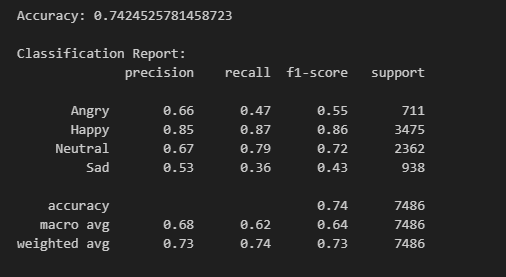

In [19]:
new_reviews = [
    "I  used to love this app, but the recent update ruined everything. It crashes constantly and I've lost all my data. It's heartbreaking to see something I relied on so much become so unreliable.",
    "it's so annoying and trash, the app button didn't even work, and the customer support doesn't exist!",
    "This is bullshit.",
    "Wow, this app is a game-changer! It's fast, intuitive, and packed with useful features. I've never been so impressed with an app before. It's made my life so much easier and I can't stop recommending it to everyone I know.",
    "Bullshit, what a waste of time. It's so useless, fuck this shit",
]

def predict(review):
    # Preprocess the review text
    new_review_tfidf = tfidf_vectorizer.transform([clean(review)])
    
    # Predict the emotion of the review
    predicted_category = svm_classifier.predict(new_review_tfidf)[0]

    return predicted_category

for i, review in enumerate(new_reviews):
    print(f"[{i+1}] {predict(review)}")

[1] Happy
[2] Sad
[3] Neutral
[4] Happy
[5] Angry
